In [131]:
import os
import umap
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

BUCKET_URL = 'https://ds-gen-ai-workshop.s3.us-west-2.amazonaws.com'
DATAFRAME_FILE = 'gen_workshop_dataframe.csv'

In [129]:
def get_file_from_s3(filename, dest_path=None):
    dest = dest_path if dest_path else filename
    
    r = requests.get(BUCKET_URL + '/' + filename)
    with open(dest,'wb') as f:  
        f.write(r.content)

def get_db_data():
    r = requests.get(BUCKET_URL + '/' + DATAFRAME_FILE)
    get_file_from_s3(DATAFRAME_FILE)    
    
    df = pd.read_csv(DATAFRAME_FILE)
    
    # Lists get stringified in csv format
    df['embedding'] = df['embedding'].apply(lambda x: eval(x))

    return df

df_raw = get_db_data()

df_raw

,prompt_id,embedding,human_time,clue,user,time,feedback_distortion,feedback_fidelity,feedback_bias,feedback_quality,feedback_notes,prompt,features,session_id,category,prompt_number
0,ed7061f6-e90c-11ed-888a-f6cc95bcc903,"[0.014202922582626343, 0.010320254601538181, -...","Tue, 02 May 2023 17:15:25 UTC","{'things': 'Crown', 'animals': 'Insect'}",bashir,1683047725,No,No,No,2,The crown is not very visible. I was thinking ...,small insect wearing big crown,NaN,NaN,NaN,NaN
1,2cff621a-f0ae-11ed-be9e-acde48001122,"[-0.001042, -0.024516, 0.0045739, 0.0090527, -...","Fri, 12 May 2023 10:17:18 UTC",NaN,josh,1683886638,No,No,No,1,NaN,Two teams line up in a stadium looking like fi...,"{'Where': 'stadium', 'What': 'rivalry'}",banana,sports,1.0
2,5502e7ae-f0eb-11ed-8d71-42c422909e41,"[-0.002388, 0.0077674, 0.0293395, -0.011088, -...","Fri, 12 May 2023 17:35:05 UTC",NaN,parth domadia,1683912905,No,No,No,3,NaN,A van gogh style painting of a photographer ch...,"{'What': 'a painting', 'Who': 'a photographer'}",banana,arts,0.0
3,afca3dea-f104-11ed-bec4-42c422909e41,"[-0.012816, 0.0019622, 0.0032089, -0.023956, -...","Fri, 12 May 2023 20:36:34 UTC",NaN,krishnaram,1683923794,No,No,No,4,NaN,a caricature of kids playing a game on a laptop,"{'What': 'a laptop', 'Who': 'some kids'}",banana,cartoon,4.0
4,59acb42a-f0ea-11ed-ae4d-42c422909e41,"[-0.024042, -0.00659, 0.0114921, -0.012053, -0...","Fri, 12 May 2023 17:28:03 UTC",NaN,murtuza,1683912483,No,Yes,Yes,1,NaN,a painter painted on a painting in an art gallery,"{'Where': 'a gallery', 'Who': 'a painter'}",banana,arts,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,a8d39d02-f0ea-11ed-94e4-42c422909e41,"[-0.03372, -0.022322, -0.020574, -0.028104, 0....","Fri, 12 May 2023 17:30:16 UTC",NaN,bashir,1683912616,No,No,No,1,NaN,people dancing in the office,"{'What': 'dancing', 'Who': 'some people in an ...",banana,cartoon,2.0
141,7ed634b6-f0e9-11ed-8ff6-42c422909e41,"[-0.026401, -0.014363, -0.006974, -0.016649, -...","Fri, 12 May 2023 17:21:56 UTC",NaN,anu,1683912116,Yes,No,Yes,2,Most of the workers are Caucasian,A cartoon of 1950s workers in an office building,"{'When': '1950s', 'Who': 'some people in an of...",banana,cartoon,0.0
142,4d9b0788-f0e8-11ed-87de-42c422909e41,"[0.0132685, -0.015255, -0.003128, -0.017832, -...","Fri, 12 May 2023 17:13:24 UTC",NaN,josh,1683911604,Yes,Yes,No,3,Appearances of people don't match empty wallet...,A mother and son with a grocery cart looking s...,"{'Where': 'a grocery store', 'Who': 'a family'}",banana,business,0.0
143,47e66384-e911-11ed-8a19-f6cc95bcc903,"[-0.010047403164207935, -0.0028799816500395536...","Tue, 02 May 2023 17:46:34 UTC","{'activities': 'Writing', 'animals': 'Lizard'}",does changing name change it?,1683049594,No,Yes,No,5,NaN,lizard writing a prompt when the name changed,NaN,NaN,NaN,NaN


In [144]:
SESSION = 'banana'
NUM_EMBEDDING_COMPONENTS = 64 # MAX 1536

df = df_raw[df_raw['session_id']==SESSION].reset_index(drop=True)
embs= np.array(df['embedding'].tolist())
reducer = umap.UMAP(n_components=2, n_neighbors=3, random_state=42)
umap_coords = reducer.fit_transform(embs[:, :NUM_EMBEDDING_COMPONENTS])

df_umap = pd.DataFrame(umap_coords, columns=['UMAP_'+str(x) for x in range(umap_coords.shape[1])])

df = pd.concat([df, df_umap], axis=1)

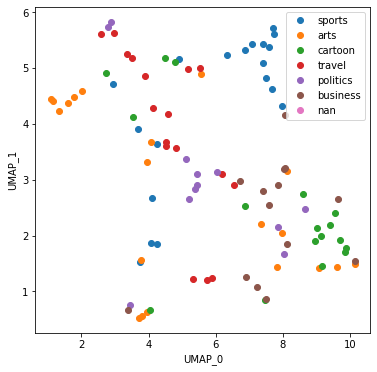

In [145]:
plt.figure(figsize=[6, 6])

col = 'category'

for val in df[col].unique():
    df_temp = df[df[col] == val]
    
    plt.plot(df_temp['UMAP_0'], df_temp['UMAP_1'], 'o', label=val)

plt.xlabel('UMAP_0')
plt.ylabel('UMAP_1')
plt.legend();

prompt_id                           5502e7ae-f0eb-11ed-8d71-42c422909e41
embedding              [-0.002388, 0.0077674, 0.0293395, -0.011088, -...
human_time                                 Fri, 12 May 2023 17:35:05 UTC
clue                                                                 NaN
user                                                       parth domadia
time                                                          1683912905
feedback_distortion                                                   No
feedback_fidelity                                                     No
feedback_bias                                                         No
feedback_quality                                                       3
feedback_notes                                                       NaN
prompt                 A van gogh style painting of a photographer ch...
features                 {'What': 'a painting', 'Who': 'a photographer'}
session_id                                         

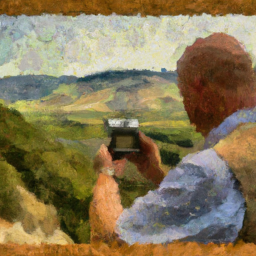

In [148]:
row_id = 1
data_row = df.iloc[index]

# Print some data
print(data_row)

# Display an Image
filename = data_row.prompt_id + '.png'
get_file_from_s3(filename)
display(Image(filename=filename))